# 7) Testing - Predicciones

Se justifica la selección del tratamiento de variables que mejores métricas ha obtenido en los distintos modelos.

Comparamos las métricas de los distintos modelos del tratamiento de variables seleccionado y seleccionamos el modelo que mejores resultado ha obtenido.

Entrenamos el referido modelo (dataset training, 150K obs) y efectuamos la predicciones sobre el dataset de test (dataset testing, 101K obs).

Generamos archivos de subida a Kaggle

#### Paquetes

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

#### Funciones

In [5]:
def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)
    
    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()

## 1) Tratamiento de variables

Para todos y cada uno de los modelos definidos, el tratamiento de datos 1 ha sido el que ha obtenido mejores resultados en términos de accuracy y recall.

## 2) Selección del modelo

## Datos tratamiento 1

#### Logística

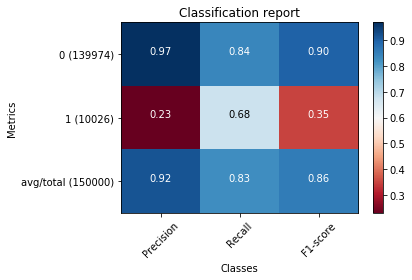

In [6]:
%store -r metricas_LG_t1
plot_classification_report(metricas_LG_t1)

#### Random Forest

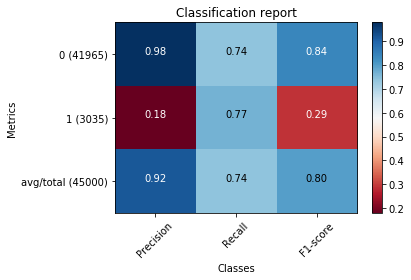

In [8]:
%store -r metricas_RF_t1
plot_classification_report(metricas_RF_t1)

In [ ]:
# SVM

In [ ]:
# XGBoost

#### Comparativa y selección de modelos

## 3) Entrenamiento del modelo y predicciones

## 4) Generar archivo para subida

In [ ]:
prediction = pd.DataFrame({
        "Id": credit_test_df["Id"],
        "Probability": Y_pred
    })
prediction.to_csv('submit.csv', index=False)